# [Car Evaluation Dataset](https://archive.ics.uci.edu/dataset/19/car+evaluation)

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.

### Estrutura do dataset

| Alvo  | Valores |
| ------------- | ------------- |
|class| {unacc, acc, good, vgood}|

| Features  | Valores |
| ------------- | ------------- |
|buying| {vhigh, high, med, low}|
|maint| {vhigh, high, med, low}|
|doors| {2, 3, 4, 5more}|
|persons| {2, 4, more}|
|lug_boot| {small, med, big}|
|safety| {low, med, high}|

### Instalação das dependências

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo 
pd.options.mode.copy_on_write = True

### Importando o dataset

In [30]:
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
Y = car_evaluation.data.targets 

# Transform labels to int
labels = Y["class"].unique()
for i in range(len(labels)):
  Y.loc[Y['class']==labels[i], 'class'] = i


### One-hot Encoding das features

In [31]:
X = pd.get_dummies(X, dtype=int)

### Dividindo os conjuntos de teste e treino

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.3, random_state = 28)
y_true = list(y_test['class'])


### Wisard

In [33]:
from wisard import Wisard

wisard = Wisard(num_classes=len(labels),n=3)

### Treinamento

In [34]:
wisard.train(x_train,y_train)

### Teste

In [35]:
predictions = wisard.classify(x_test)
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
acc = round(accuracy_score(y_true, predictions) * 100, 2)
print(f'Acurácia obtida: {acc:.2f}%')

prec = round(precision_score(y_true, predictions, average="macro", zero_division=np.nan) * 100, 2)
print(f'Precisão obtida: {prec:.2f}%')

recall = round(recall_score(y_true, predictions, average="macro") * 100, 2)
print(f'Recall obtido: {recall:.2f}%')

f1 = round(f1_score(y_true, predictions, average="macro") * 100, 2)
print(f'F1 Score obtida: {f1:.2f}%')


Acurácia obtida: 72.83%
Precisão obtida: 72.83%
Recall obtido: 25.00%
F1 Score obtida: 21.07%


### Comparação com o MLP(Primeiro Trabalho)

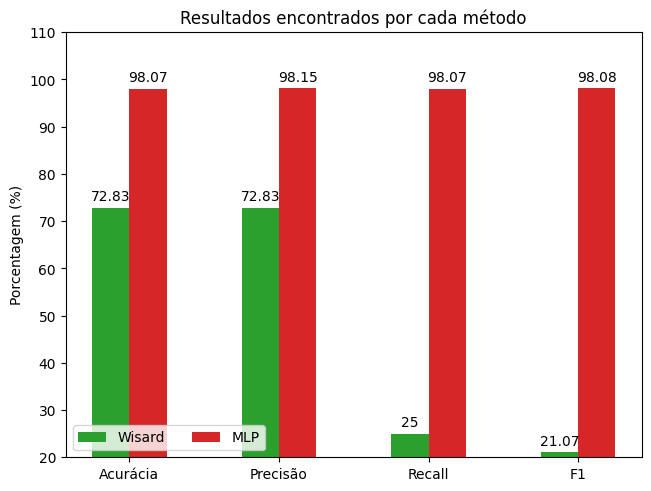

In [43]:

import matplotlib.pyplot as plt
import numpy as np

measurements = ("Acurácia", "Precisão", "Recall", "F1")
methods = {
    'Wisard': (acc, prec, recall, f1),
    'MLP': (98.07, 98.15, 98.07, 98.08), # Resultados obtidos em: https://github.com/GabrielaPC/MultiLayerPerceptron 
}

x = np.arange(len(measurements))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    if attribute == 'Wisard':
        color = "tab:green"
    else:
        color = "tab:red"

    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Resultados encontrados por cada método')
ax.set_xticks(x + width/2, measurements)
ax.legend(loc='lower left', ncols=3)
ax.set_ylim(20, 110)

plt.show()